# Prediction of music genre

Dataset que contiene caracteristicas tecnicas de canciones, las cuales se traducen en generos musicales diferentes.

# Objetivo

Modelo de clasificacion muticlase:

- Usando el Machine Learning como herramienta, se va a entrenar un modelo predictor que sea capaz de clasificar las canciones en generos segun sean sus caracteriticas técnicas.

# Referencia

El dataset ha sido descargado de la plataforma [Kaggle](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre/data).

---
---
---

# Machine Learning Supervisado: Clasificador multiclase

Predicción del género de cada canción

## 0 - Librerias

Aqui se cargaran las librerias que se van a ir usando durante el analisis, entrenamiento y testeo del modelo.


In [ ]:
# Librerias de análisis y exploración

import numpy as np
import pandas as pd
import utils.ML_tool_box_basic_plot as tbb
import matplotlib.pyplot as plt
import seaborn as sns
import utils.bootcampviztools as bt


## 1- Carga de los datos y primer vistazo

In [ ]:
df_music = pd.read_csv("./data/music_genre.csv")

In [3]:
df_music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [4]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
df_music.describe(include="all")

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000,50000,50000.000000,50000
unique,NaN,6863,41699,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,29394,5,NaN,10
top,NaN,empty_field,Home,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,?,4-Apr,NaN,Electronic
freq,NaN,2489,16,NaN,NaN,NaN,NaN,NaN,NaN,5727,NaN,NaN,32099,NaN,4980,44748,NaN,5000
mean,55888.396360,NaN,NaN,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,NaN,0.193896,-9.133761,NaN,0.093586,NaN,NaN,0.456264,NaN
std,20725.256253,NaN,NaN,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,NaN,0.161637,6.162990,NaN,0.101373,NaN,NaN,0.247119,NaN
min,20002.000000,NaN,NaN,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,NaN,0.009670,-47.046000,NaN,0.022300,NaN,NaN,0.000000,NaN
25%,37973.500000,NaN,NaN,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,NaN,0.096900,-10.860000,NaN,0.036100,NaN,NaN,0.257000,NaN
50%,55913.500000,NaN,NaN,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,NaN,0.126000,-7.276500,NaN,0.048900,NaN,NaN,0.448000,NaN
75%,73863.250000,NaN,NaN,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,NaN,0.244000,-5.173000,NaN,0.098525,NaN,NaN,0.648000,NaN


In [6]:
tbb.ALL_describe_features(df_music)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,instance_id,float64,50000,5,0.01,50000,99.99,Numérica Continua
1,artist_name,object,50000,5,0.01,6863,13.72,Numérica Discreta
2,track_name,object,50000,5,0.01,41699,83.39,Numérica Continua
3,popularity,float64,50000,5,0.01,99,0.20,Numérica Discreta
4,acousticness,float64,50000,5,0.01,4193,8.39,Numérica Discreta
5,danceability,float64,50000,5,0.01,1088,2.18,Numérica Discreta
6,duration_ms,float64,50000,5,0.01,26028,52.05,Numérica Continua
7,energy,float64,50000,5,0.01,2085,4.17,Numérica Discreta
8,instrumentalness,float64,50000,5,0.01,5131,10.26,Numérica Discreta
9,key,object,50000,5,0.01,12,0.02,Numérica Discreta


## 2 - Target

El target sera el genero musical.    
En este caso la columna "music_genre" es la que contiene esta información.

In [7]:
target = "music_genre"

El target esta completamente balanceado.  
Si mas adelante hay que hacer modificaciones del dataset, se volvea a revisar el target para ver si es necesario usar el argumento class_weight para que el modelo tenga en consideracion la o las clases desbalanceadas.

In [8]:
df_music[target].value_counts()

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

## 3 - Analisis variables

Se observa que hay valores NaNs, pero en todas las columnas, incluido el target.    

Esto hace pensar que debe de estar afectada la fila completamente, por lo que de ser asi habria que borrar esas filas afectadas.

In [9]:
filas_nan = df_music[df_music.isna().any(axis=1)]
filas_nan

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_music.dropna(axis=0, how="all", inplace=True)
tbb.ALL_describe_features(df_music)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,instance_id,float64,50000,0,0.0,50000,100.00,Numérica Continua
1,artist_name,object,50000,0,0.0,6863,13.73,Numérica Discreta
2,track_name,object,50000,0,0.0,41699,83.40,Numérica Continua
3,popularity,float64,50000,0,0.0,99,0.20,Numérica Discreta
4,acousticness,float64,50000,0,0.0,4193,8.39,Numérica Discreta
5,danceability,float64,50000,0,0.0,1088,2.18,Numérica Discreta
6,duration_ms,float64,50000,0,0.0,26028,52.06,Numérica Continua
7,energy,float64,50000,0,0.0,2085,4.17,Numérica Discreta
8,instrumentalness,float64,50000,0,0.0,5131,10.26,Numérica Discreta
9,key,object,50000,0,0.0,12,0.02,Numérica Discreta


### Implementacion en el pipeline:

In [11]:
# pipeline_drop_na = Pipeline(steps=[
#     ('drop_na', SimpleImputer(strategy='constant', fill_value=None, add_indicator=False))
# ])

De primeras se observa que hay columnas que no nos interesan para el proyecto, debido a su gran cardinalidad y al no querer usarlas para obtener el tipo de genero, pues se pretende ver si es posible una clasificacion de las canciones sin tener en cuenta el artista y el nombre de la cancion.  
 
Por tal motivo, se van a borrar las siguientes columnas:    

- "instance_id" --> No necesitamos un indice expliticito.    
- "artist_name" --> Queremos clasificar por caracteristicas de la canción sin tener en cuenta quien es el artista.    
- "track_name" --> Idem a la anterior, pero por el nombre de la canción.    
- "obtained_date" --> No es relevante la fecha de obtencion de cada fila.    

In [12]:
columns_to_drop =["instance_id", "artist_name", "track_name", "obtained_date"]

In [13]:
df_music.drop(columns=columns_to_drop, inplace=True)

*OK --> NUM -->  **popularity**: parece que esta todo correcto. Los valores van de 0 a 99 (los dividremos entre 100 posteriormente) y no hay valores extranos. Ya esta en formato float.*   

*OK --> NUM --> **acousticnes**: los valores van de 0 a 0,99, perfecto para ML. No hay valores negativos ni tampoco valores que no sean numéricos. Ya esta en formato float.*   

*OK --> NUM --> **danceability**: va desde 0,05 hasta 0,99, perfecto para ML. Tampoco tiene valores negativos ni no numéricos. Ya esta en formato float.*   

*NOK --> NUM --> **duration_ms**: se observa valores negativos, por lo que habra que estudiar las filas con esos valores y valorar que hacer con ellas, pues una cancion no puede tener valores negativos de duracion.*   

*OK --> NUM --> **energy**: valores cercanos al 0 hasta 0,99, perfecto para ML. No se observa nada extrano y ya esta en formato float.*   

*OK --> NUM --> **instrumentalness**: valores entre 0 y 0,99, perfecto para ML. No hay valores negativos ni se observa nada raro. Ya esta en formato float.*   

*NOK --> CAT -->  **key**: valores de la A a la G. Parece como que algunos de ellos tiene "#" junto a la letra. se vera si es un error o un tipo de key diferente. Se sacaran las frecuecnias de cada uno y se tomara una decisión individual al no poder pregunta a negocio.*   

*OK --> NUM --> **liveness**: valores entre 0 y 1, perfecto para ML. No hay negativos ni nada extraño. Ya en forato float.*   

*OK --> NUM --> **loudness**: valores entre -47 y 3,7. No se observan valores no numericos. se analizara la mejor trans formacion. Ya en formato float.*   

*OK --> CAT-BI --> **mode**: binaria con categorias "minor" y "major". Se codificara para pasarla a numerica o mejor, se hará un One-Hot.*   

*OK --> NUM --> **speechiness**: valores entre casi 0 y 0,94, perfecto para ML. No hay negativos ni nada extraño. Ya en formato float.*   

*NOK --> NUM --> **tempo** --> es numerica, pero se observa que tiene valores "?". Se analizara para ver que hacer con ellos. El data frame es muy grande, 50000 filas, por lo que segun el numero de filas afectadas y si no afecta a la clase mas desbalanceada, se eliminaran.*   

*OK --> NUM --> **valence**: valores entre 0 y 0,99, perfecto para ML. No hay valores negativos ni raros. Ya esta en formato float.*   

*TARGET --> OK --> CAT --> **music_genre**: es el target. No se ven palabras duplicadas o mal escritas, por lo que es correcto para ser usado.*


## 4 - Limpieza de features

### Se van a analizar en primera instancia las columnas que presentaban valores incompatibles con el entrenamiento correcto del modelo

## `duration`

Hay valores con -1, siendo un valor no posible en referencia a la duracion de una canción.   
Al desconocer el porque de este valor, si es que tiene algun significado, se va a procder a borrar las filas con este valor, pues al disponer de 50.000 instancias, no supone ningun problema.   
Aun asi se analizara el impacto en el balanceo del target.

In [14]:
df_music["duration_ms"].value_counts()

duration_ms
-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: count, Length: 26028, dtype: int64

### Eliminación valores no correctos

In [15]:
filtro_duration = df_music["duration_ms"] >= 0

df_music = df_music.loc[filtro_duration]

In [16]:
df_music["duration_ms"].value_counts()

duration_ms
240000.0    33
192000.0    32
180000.0    28
216000.0    20
186000.0    19
            ..
154574.0     1
359213.0     1
656213.0     1
506320.0     1
189483.0     1
Name: count, Length: 26027, dtype: int64

### Impacto en target:

Se comprueba que el target se ha visto poco afectado, pues se han quitado los valores de una manera muy equilibrada por cada grupo de genero musical.

In [17]:
df_music["music_genre"].value_counts(True)*100

music_genre
Anime          10.046382
Electronic     10.024189
Blues          10.024189
Hip-Hop        10.008655
Alternative    10.006436
Country        10.004217
Jazz            9.993120
Rock            9.970928
Classical       9.962051
Rap             9.959832
Name: proportion, dtype: float64

### Análisis gráfico

Se observan los valores muy concetrados entre valores cercanos al 0 (realmente no estan en cero, pero la representacion de la KDE asi lo hace parecer) y 0.4*1e6.   
En segundos van desde los 15 segundos (15509 ms) y los 6 minutos (400000 ms).   
Se observa una larga cola, la cual es debido sobre todo a 4 generos un genero en cocreto, "Classical", "Blues", "Electronic" y "Jazz".   
No son outlayers propiamente dicho, sino que hay generos donde hay canciones con largas duraciones, por lo que trataremos mas adelante esta feature aplicandole una tranformacion que ayude al modelo a gestionarla mejor.


In [18]:
df_music["duration_ms"].min()

15509.0

(2,)


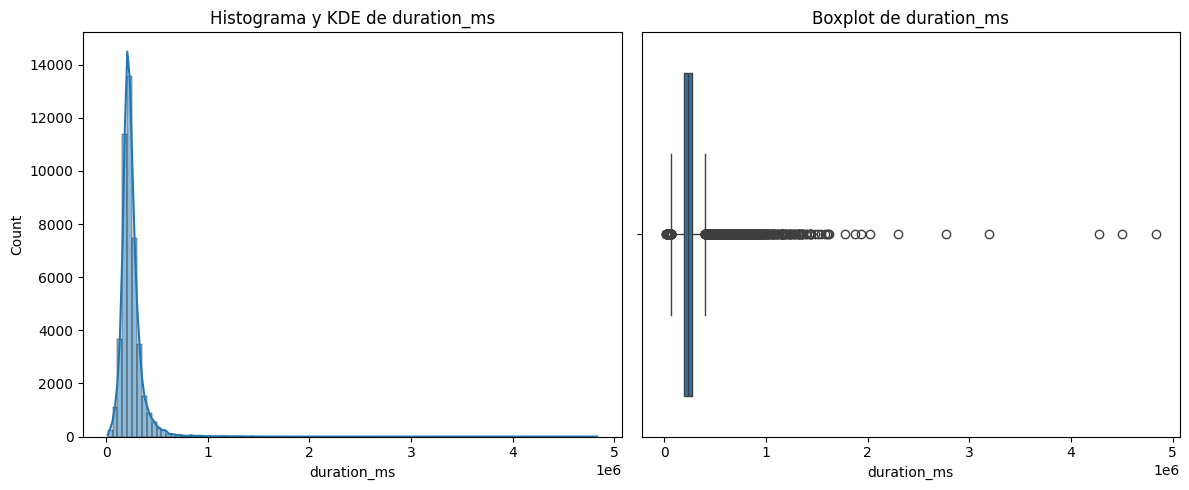

In [19]:
bt.plot_combined_graphs(df_music,["duration_ms"], bins=100)

<Axes: xlabel='duration_ms', ylabel='Density'>

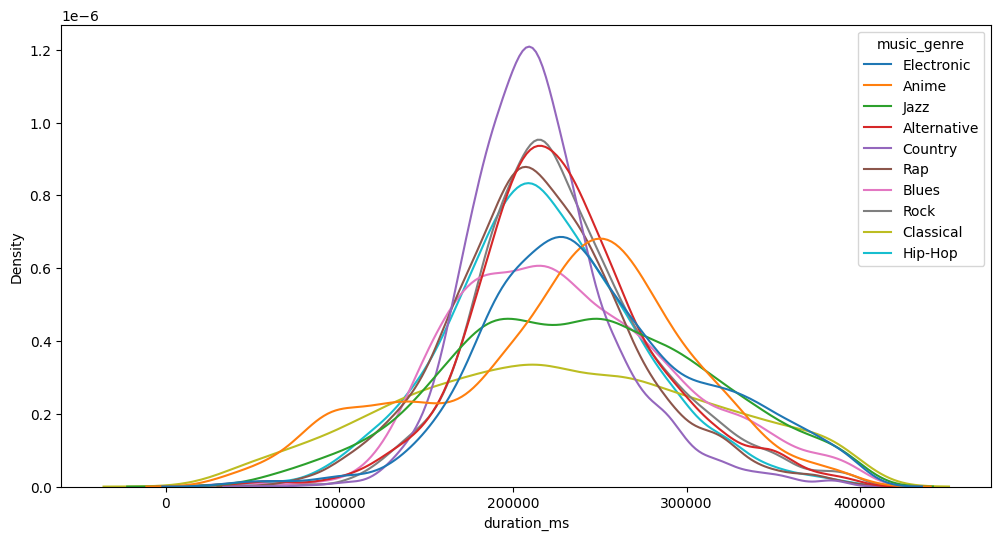

In [20]:
filtro_duration = df_music["duration_ms"] < 400000


plt.figure(figsize=(12,6))
sns.kdeplot(df_music.loc[filtro_duration], x="duration_ms", hue=target, palette="tab10")

In [21]:
df_music.loc[~filtro_duration].groupby(["music_genre"])["duration_ms"].count().sort_values(ascending=False)


music_genre
Classical      1004
Jazz            447
Electronic      389
Blues           334
Rock            113
Alternative      85
Anime            71
Rap              43
Hip-Hop          41
Country          22
Name: duration_ms, dtype: int64

### Implementación en el pipeline:

In [22]:
def remove_negative_values(X):
    
    X = X.copy()
    X = X[X["duration_ms"] >= 0]
    return X

In [23]:
# pipeline_remove_negatives = Pipeline(steps=[
#     ('negative_remover', FunctionTransformer(remove_negative_values, validate=False))
# ])

## `key`

Se observa que muy posiblemente los valores reales sean de la letra A a la G, pero varios de ellos tiene el simbolo "#" adosado al caractere alfabetico.  
Se va a optar por quitar el simbolo, dejando unicamente los valores de la A a la G.

In [24]:
df_music.groupby(["key"])["music_genre"].count()

key
A     4340
A#    3044
B     3422
C     4955
C#    4897
D     4753
D#    1450
E     3373
F     3904
F#    2780
G     5157
G#    2986
Name: music_genre, dtype: int64

### Análisis gráfico

El analisis grafico se centrara una vez convertidos los datos (graficas del punto "Modificacion valores con "#"").    
Se ven diferencias entre el tamaño de las barras segun el genero. Si que es cierto que tiene una forma parecida a simple vista, pero en el detalle hay barras con frecuencias sensiblemente diferentes que podran ayudar al modelo.

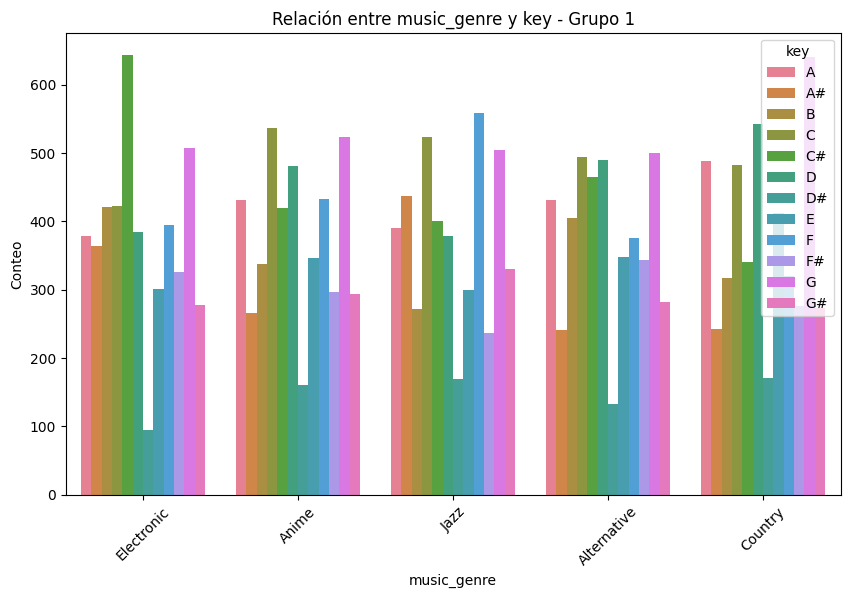

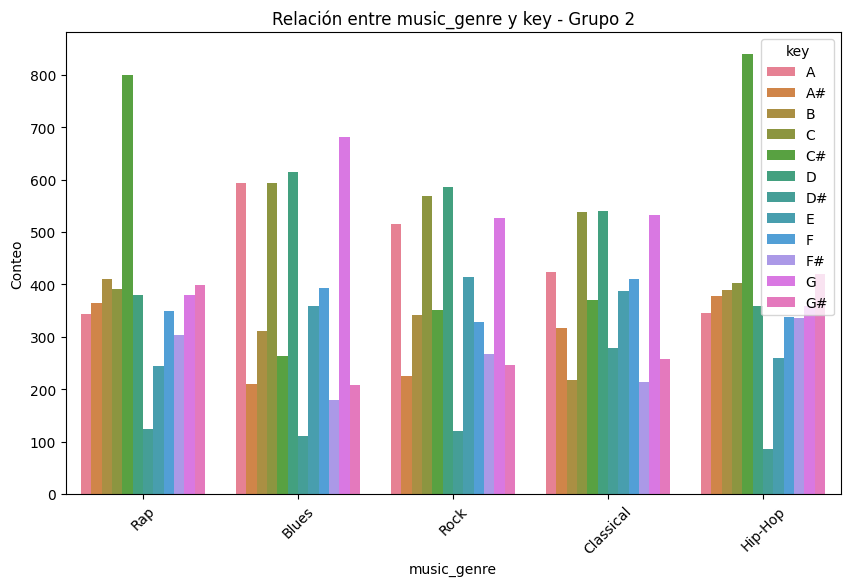

In [25]:
bt.plot_categorical_relationship_fin(df_music,cat_col1=target, cat_col2="key")

### Modificacion valores con "#"

In [26]:
def value_change(value):
    if "#" in value:
        return value.replace("#", "")
    return value

In [27]:
df_music["key"] = df_music["key"].apply(value_change)

C:\Users\Luis\AppData\Local\Temp\ipykernel_10360\1862411005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music["key"] = df_music["key"].apply(value_change)


In [28]:
df_music.groupby(["key"])["music_genre"].count()

key
A    7384
B    3422
C    9852
D    6203
E    3373
F    6684
G    8143
Name: music_genre, dtype: int64

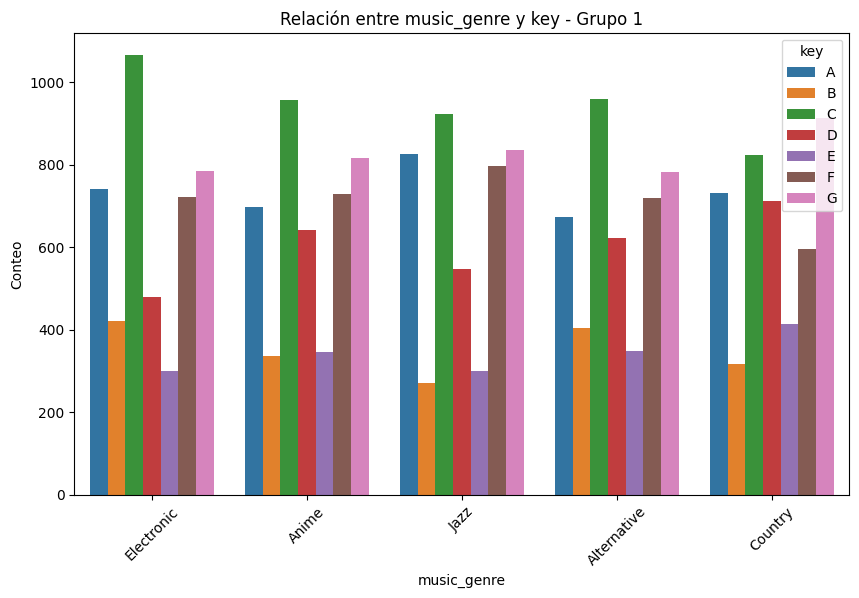

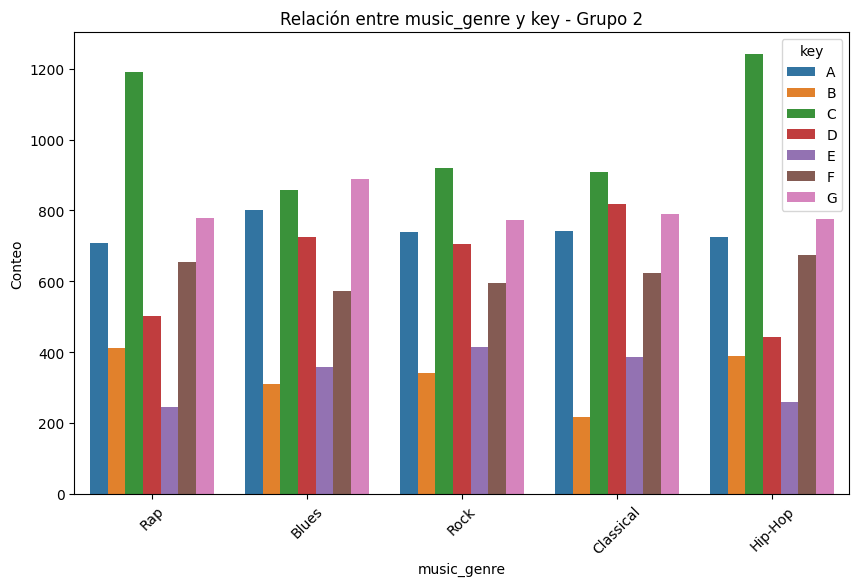

In [29]:
bt.plot_categorical_relationship_fin(df_music,cat_col1=target, cat_col2="key")

### Implementación en el pipeline:

In [30]:
def clean_key_column(X):
    
    X['key'] = X['key'].apply(lambda value: value.replace("#", "") if "#" in value else value)
    return X

# pipeline_clean_key = Pipeline(steps=[
#     ('key_cleaner', FunctionTransformer(clean_key_column, validate=False))
# ])

In [31]:
# pipeline_clean_key = Pipeline(steps=[
#     ('key_cleaner', FunctionTransformer(clean_key_column, validate=False))
# ])

## `tempo`

Se observan 4501 valores no numéricos, en concreto el simbolo "?".    
   
Debido a esto la columna es de tipo object, no permitiendo su procesamiento como numérica.    

Se va a crear un dataframe sin "?" para analiar la variable correctamente.   

In [32]:
df_music.tempo.value_counts()

tempo
?                     4501
120.0                   17
140.007                 17
100.00299999999999      15
130.016                 14
                      ... 
159.94299999999998       1
104.214                  1
100.583                  1
172.06099999999998       1
99.20100000000001        1
Name: count, Length: 27289, dtype: int64

In [33]:
filtro_tempo = df_music["tempo"] != "?"

In [34]:
df_music.loc[filtro_tempo].shape

(40560, 14)

### Eliminación valores no correctos (en df_music_tempo)

In [35]:
df_music_tempo = df_music.loc[filtro_tempo]
df_music_tempo["tempo"] = df_music_tempo["tempo"].astype(float)
df_music_tempo.describe()

C:\Users\Luis\AppData\Local\Temp\ipykernel_10360\1536228255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_tempo["tempo"] = df_music_tempo["tempo"].astype(float)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.000000,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,44.276677,0.305974,0.558418,2.454895e+05,0.600330,0.181603,0.193820,-9.126369,0.093738,119.874523,0.456921
std,15.545617,0.341108,0.178652,1.101214e+05,0.264501,0.325710,0.161501,6.154679,0.101502,30.653215,0.246942
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,0.259000
50%,45.000000,0.144000,0.569000,2.275330e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,0.449000
75%,56.000000,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344000,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


### Impacto en target:

Se comprueba que el target se ha visto poco afectado, pues se han quitado los valores de una manera muy equilibrada por cada grupo de genero musical.

In [36]:
df_music_tempo.music_genre.value_counts()

music_genre
Rock           4099
Hip-Hop        4077
Anime          4064
Jazz           4064
Alternative    4051
Country        4049
Blues          4046
Rap            4042
Classical      4036
Electronic     4032
Name: count, dtype: int64

### Análisis gráfico

Como se ve, hay mucho desplazamiento y cruce de lineas, por lo que es una feature que proporcionara buena informacion al modelo.

<Axes: xlabel='tempo', ylabel='Density'>

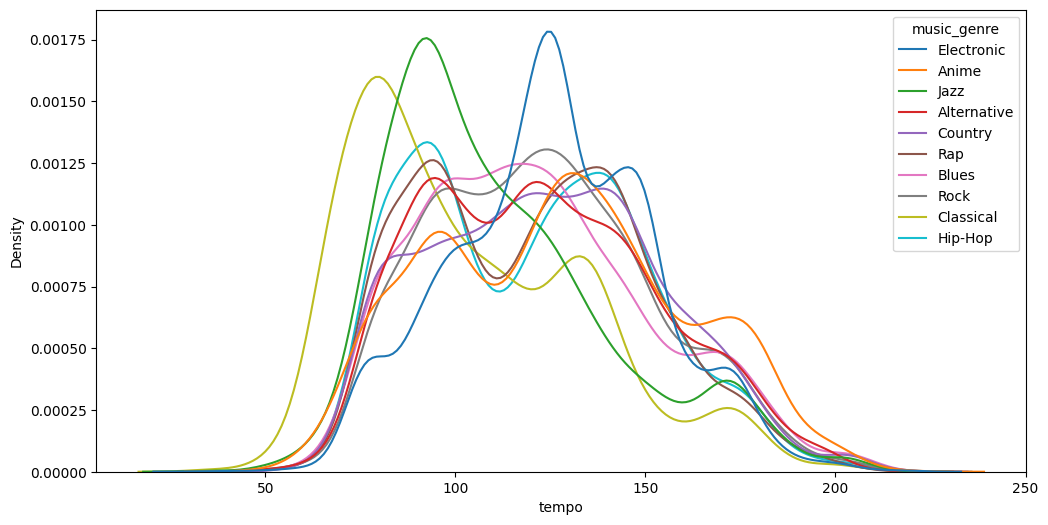

In [37]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_music_tempo, x="tempo", hue=target, palette="tab10")

### Aplicar cambios al DF original

In [38]:
df_music = df_music.loc[filtro_tempo]
df_music["tempo"] = df_music["tempo"].astype(float)
df_music.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.000000,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,44.276677,0.305974,0.558418,2.454895e+05,0.600330,0.181603,0.193820,-9.126369,0.093738,119.874523,0.456921
std,15.545617,0.341108,0.178652,1.101214e+05,0.264501,0.325710,0.161501,6.154679,0.101502,30.653215,0.246942
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,0.259000
50%,45.000000,0.144000,0.569000,2.275330e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,0.449000
75%,56.000000,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344000,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [39]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40560 entries, 1 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        40560 non-null  float64
 1   acousticness      40560 non-null  float64
 2   danceability      40560 non-null  float64
 3   duration_ms       40560 non-null  float64
 4   energy            40560 non-null  float64
 5   instrumentalness  40560 non-null  float64
 6   key               40560 non-null  object 
 7   liveness          40560 non-null  float64
 8   loudness          40560 non-null  float64
 9   mode              40560 non-null  object 
 10  speechiness       40560 non-null  float64
 11  tempo             40560 non-null  float64
 12  valence           40560 non-null  float64
 13  music_genre       40560 non-null  object 
dtypes: float64(11), object(3)
memory usage: 4.6+ MB


### Implementación en el pipeline:

In [40]:
def clean_and_convert_tempo(X):
   
    X = X[X['tempo'] != "?"].copy()
    X['tempo'] = X['tempo'].astype(float)
    
    return X

In [41]:
# pipeline_clean_tempo = Pipeline(steps=[
#     ('tempo_cleaner', FunctionTransformer(clean_and_convert_tempo, validate=False))
# ])

## 5 - Análisis de Features Num y Cat

### Numéricas

Tras analizar las variables numéricas, se ve claramente que todas las features aportan significativamente a poder diferenciar los generos musicales.   
Cierto es que no todas por igual, pero algunas de ellas tienen cruces y formas muy atractivas para que el modelo aprenda a sacar patrones.   

Me voy a quedar con todas las numéricas.   

In [42]:
numeric_columns = []

for column in df_music.columns:
    if pd.api.types.is_numeric_dtype(df_music[column]) and column not in columns_to_drop and column not in target:
        numeric_columns.append(column)

In [43]:
numeric_columns

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

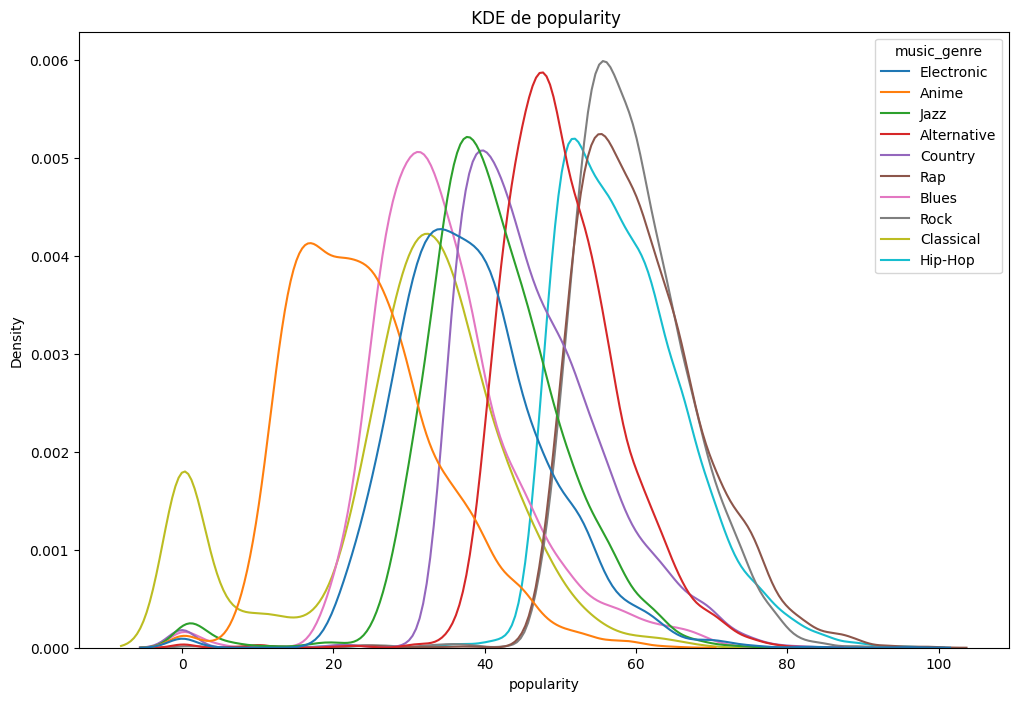

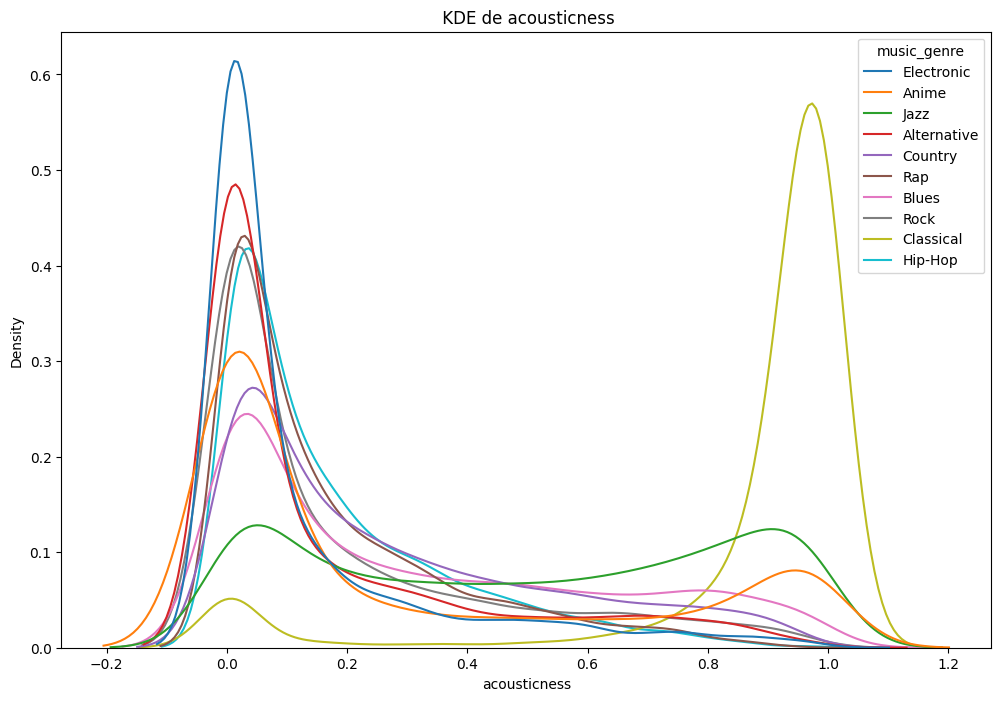

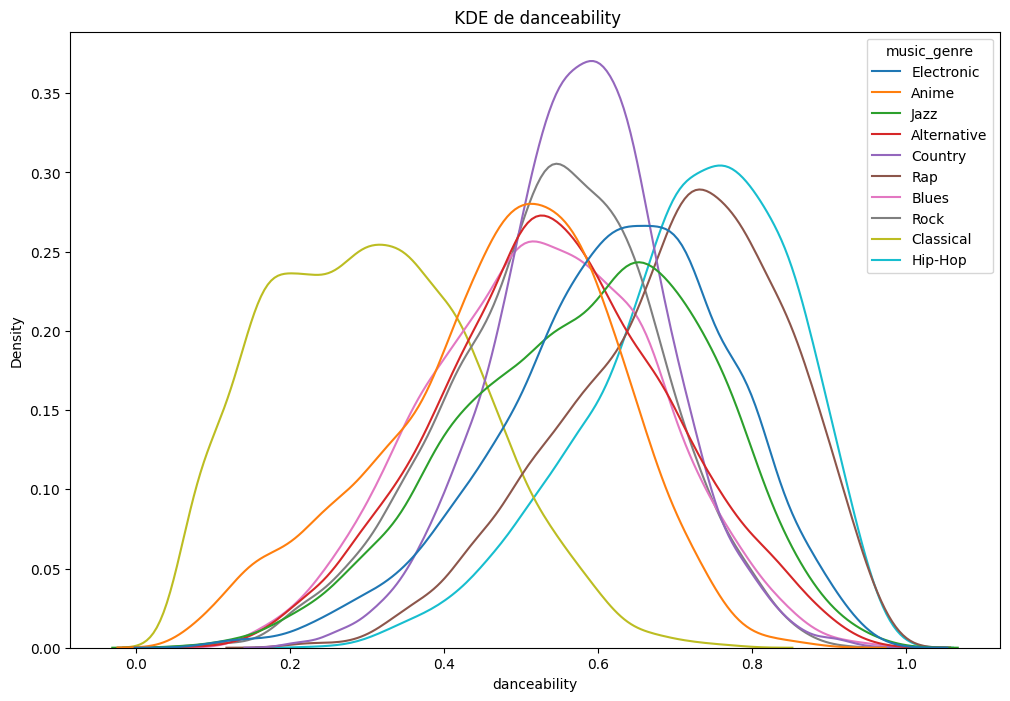

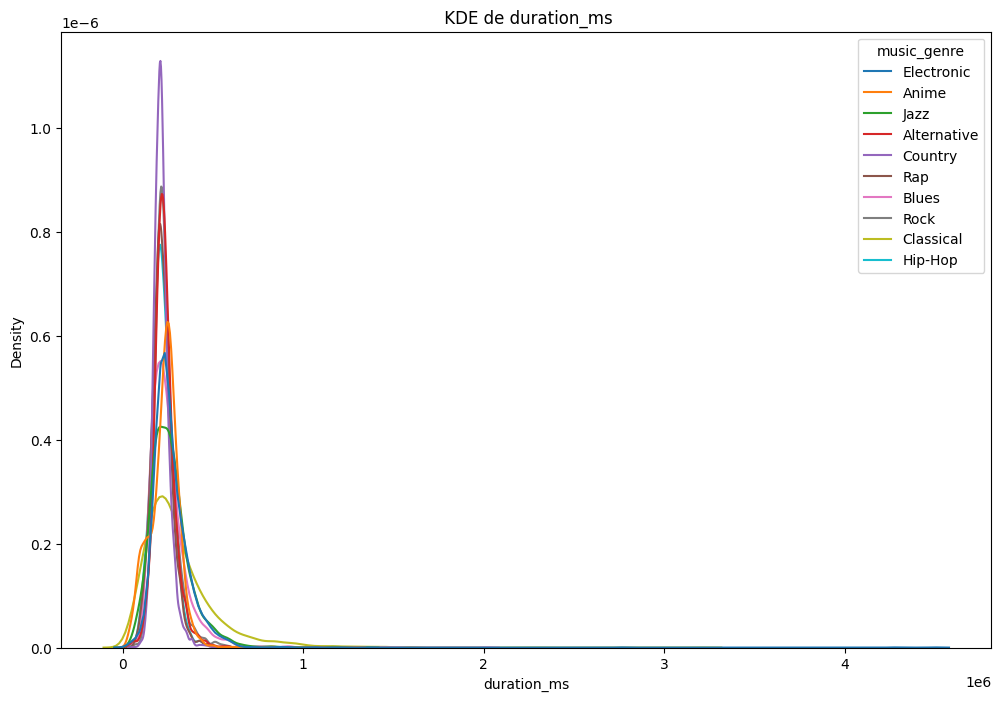

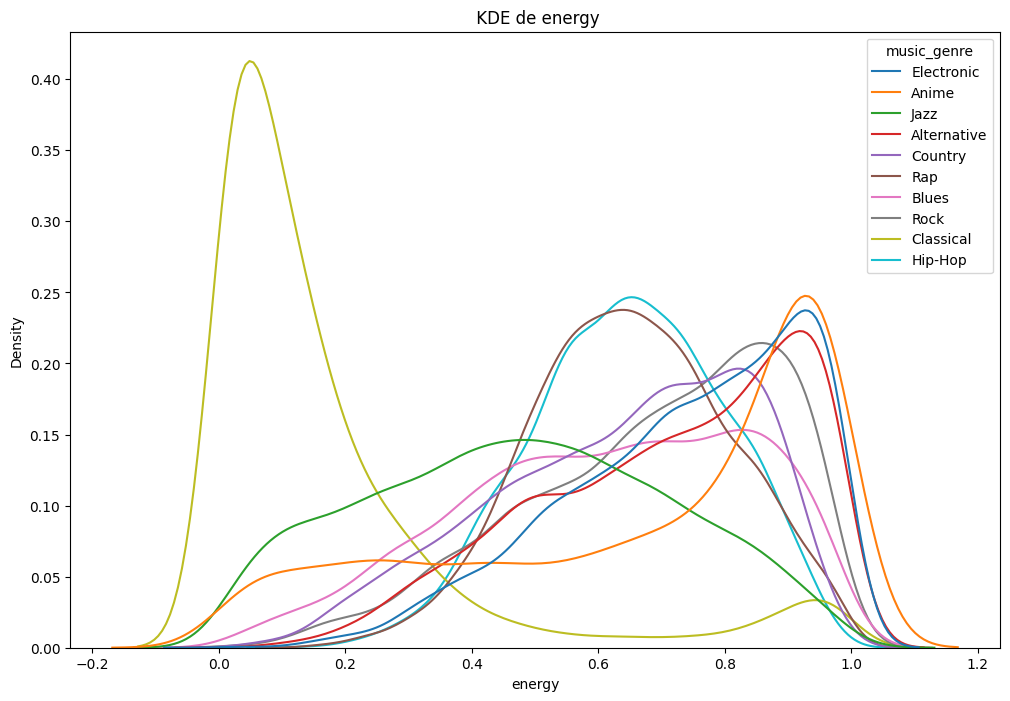

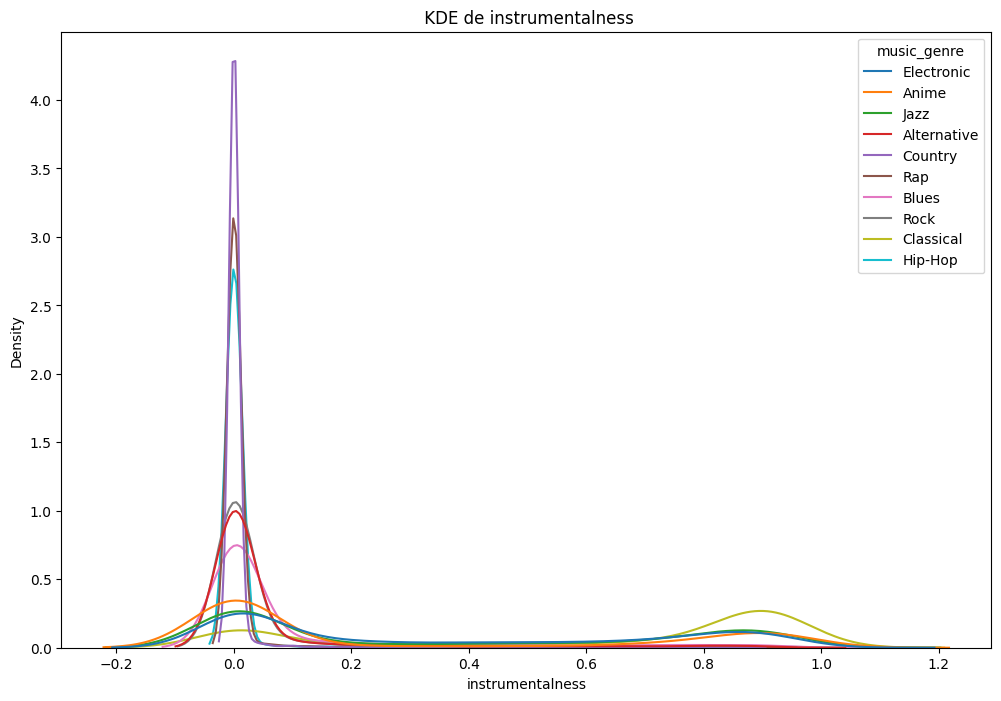

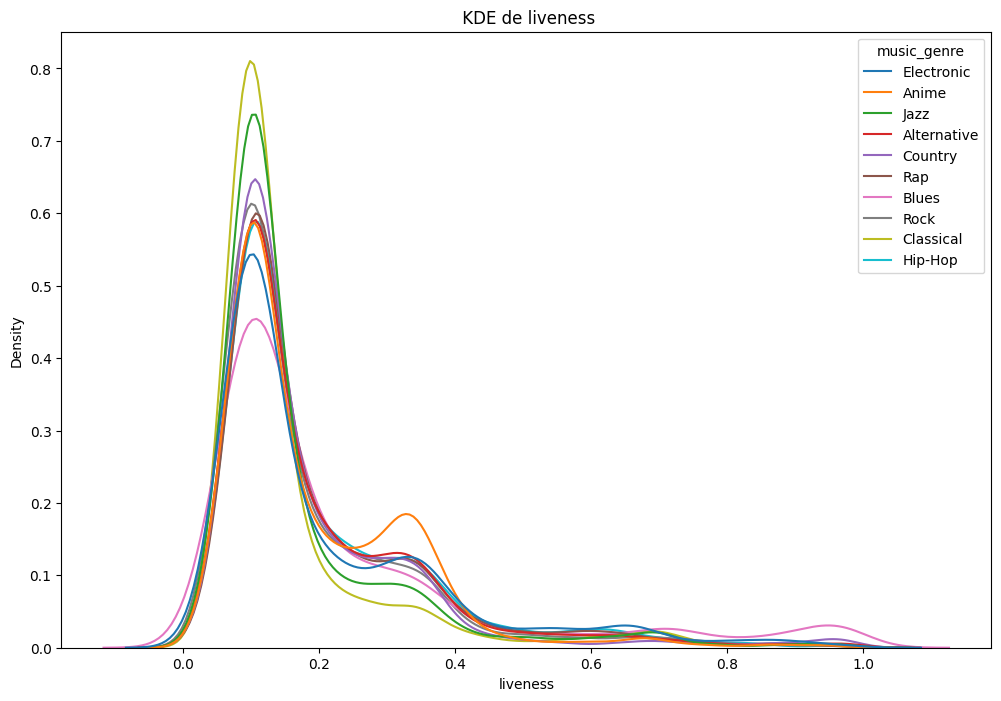

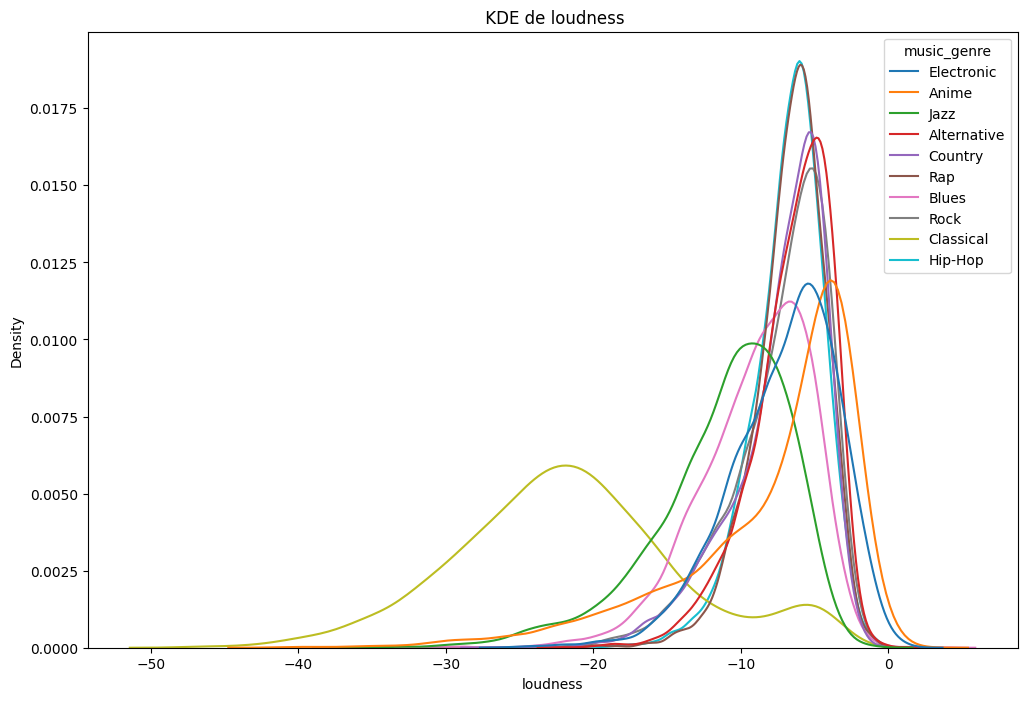

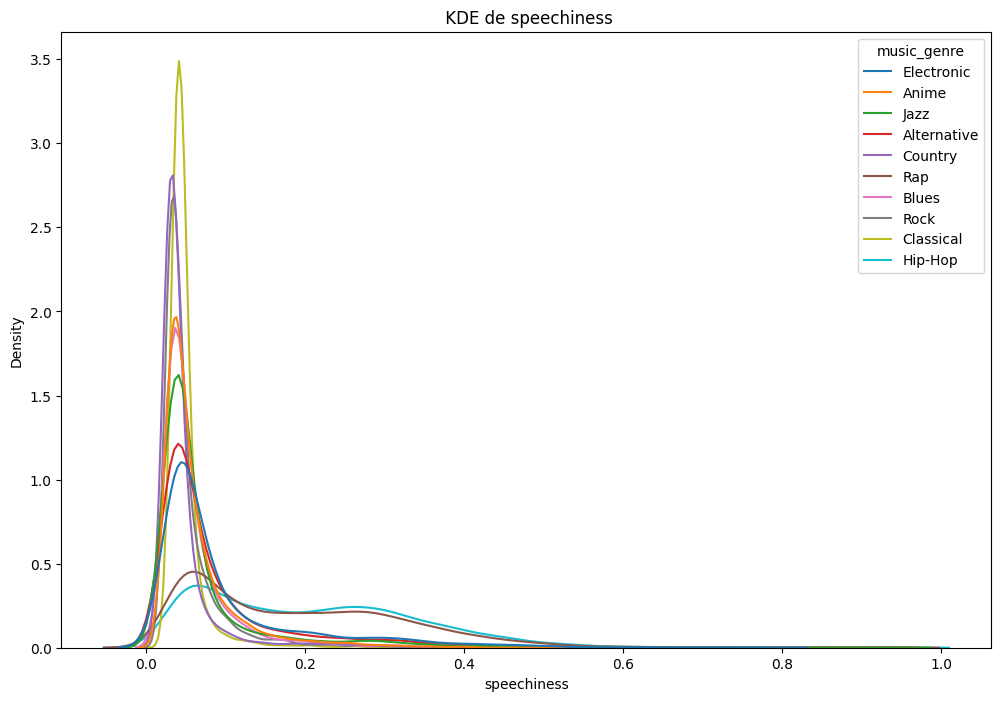

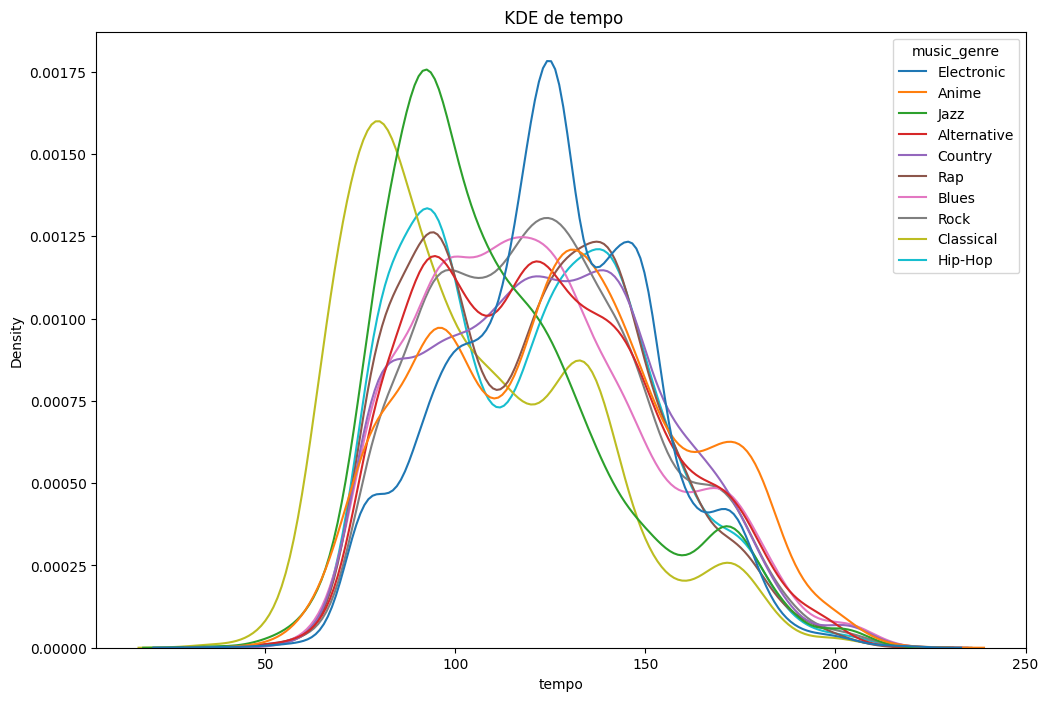

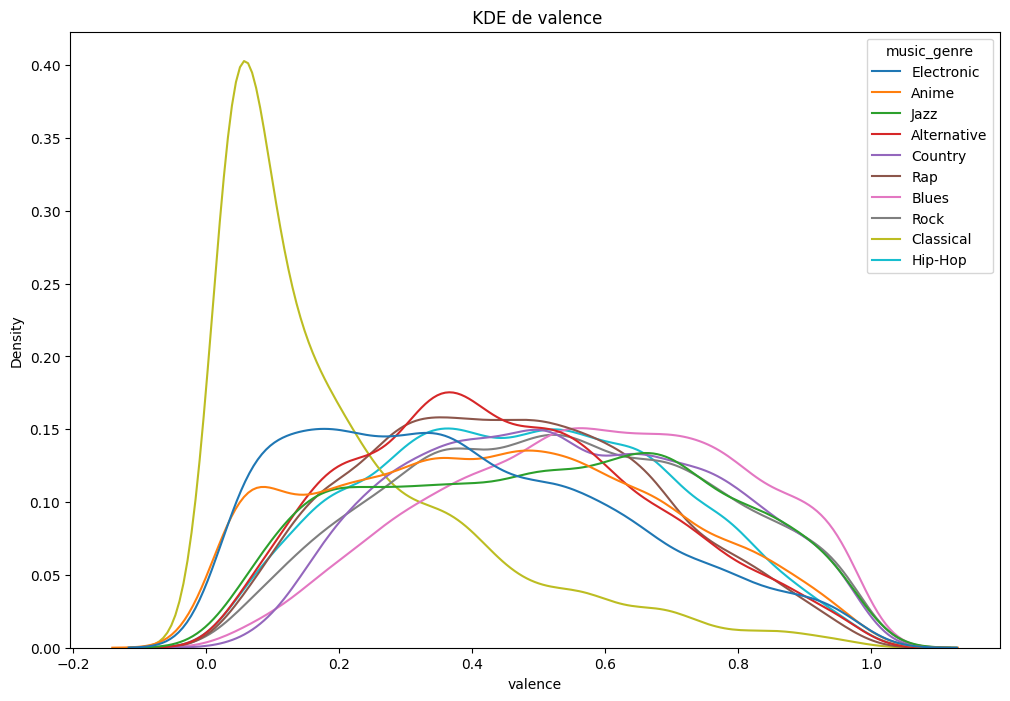

In [44]:
for num_fea in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.kdeplot(df_music, x=num_fea, hue=target, label= num_fea)
    plt.title(f" KDE de {num_fea}")

plt.show()

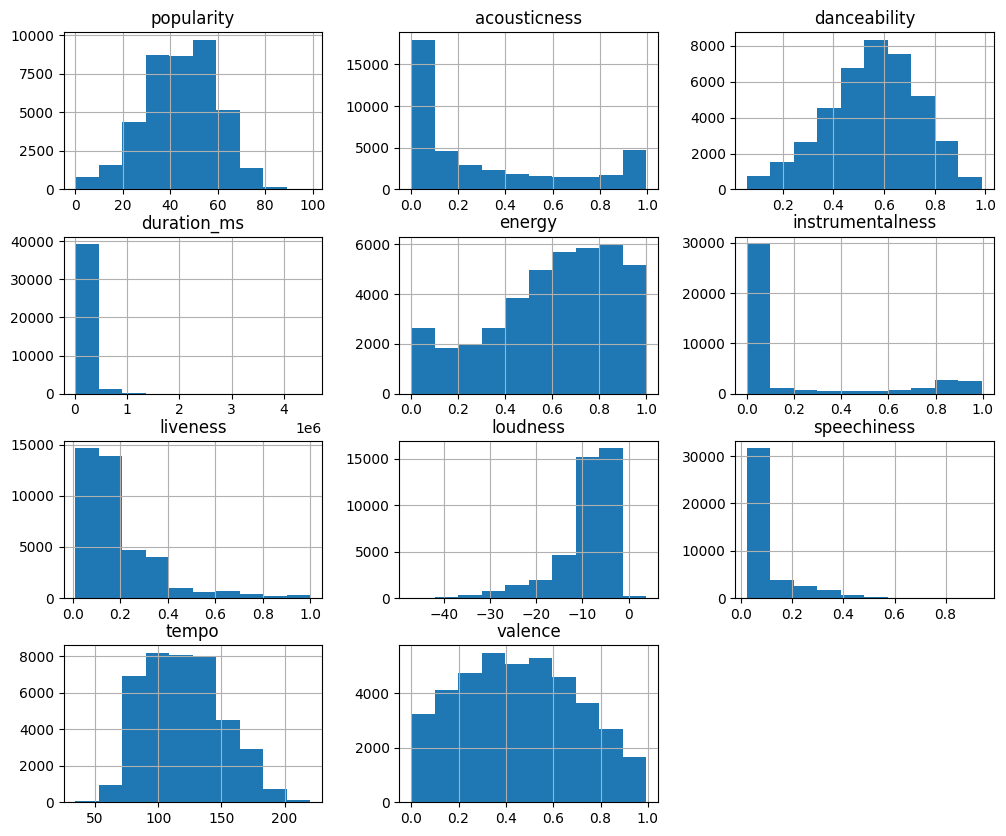

In [45]:
df_music[numeric_columns].hist(figsize=(12,10));

### Categóricas

Tras analizar las variables categóricas, se ve como la frecuanias de cada uno de los generos es diferente segun el valor de "key", por lo tanto es una feature valida.   
Lo mismo ocurre con "mode" donde hay diferencias significativas entre los generos y esta feature.

Me voy a quedar con todas las categóricas.   

In [46]:
cat_columns = []

for column in df_music.columns:
    if not pd.api.types.is_numeric_dtype(df_music[column]) and column not in columns_to_drop and column not in target:
        cat_columns.append(column)


In [47]:
cat_columns

['key', 'mode']

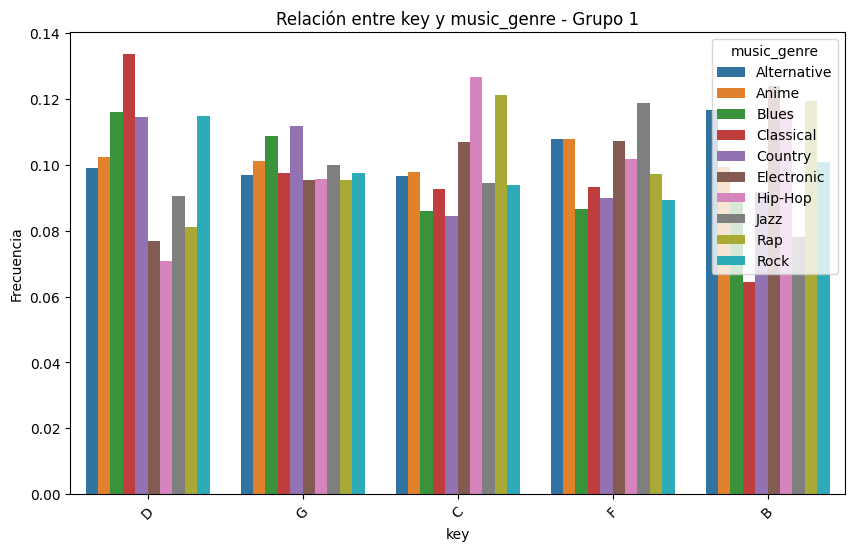

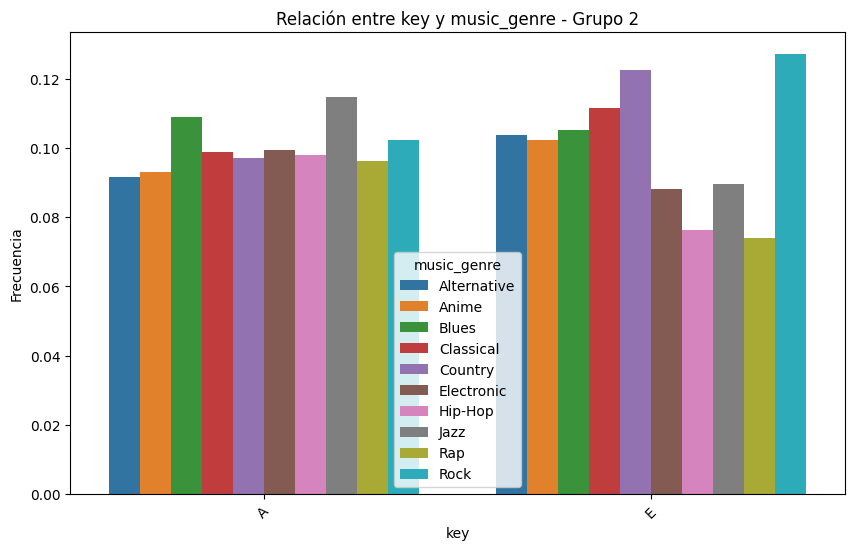

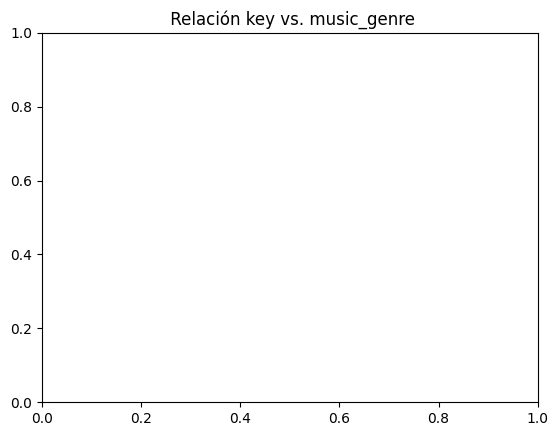

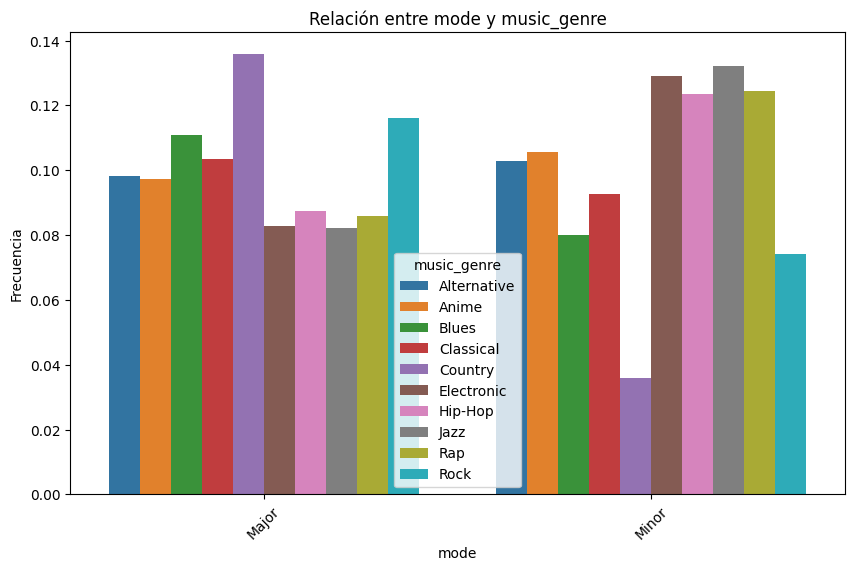

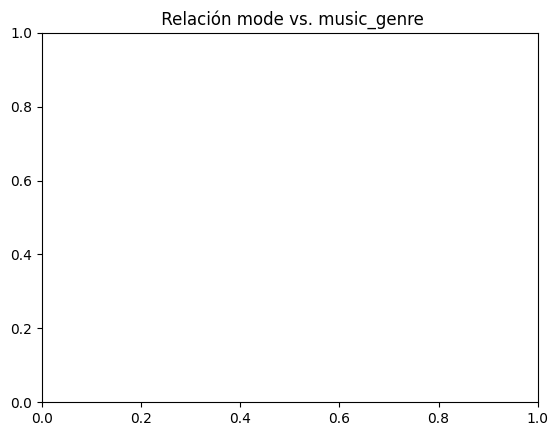

In [48]:
for cat_fea in cat_columns:
    bt.plot_categorical_relationship_fin(df_music, cat_col1=cat_fea, cat_col2=target, relative_freq=True)
    plt.title(f" Relación {cat_fea} vs. {target}")


## 6 - Tratamiento de features, modelado y entranamiento con Pipelines

El tratamiento de features se va a hacer mediante Pipelines de scikit-learn.
Al ser un modelo de classificacion no va a ser necesario estandarizar los datos ni modificar las categoricas.

In [102]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

In [89]:
# Carga del dataset
df_music = pd.read_csv("./music_genre.csv")

### Eliminacion de filas con valor "?" en la columna "tempo":

Durante el desarrollo de este notebook se probo a aplicar esta transformacion del data frame a traves del pipeline.    
El problema es que este cambio solo se aplica a X_train, dejando y_train con mas instancias, lo que da error de forma.   

Por tal motivo, esta transformacion se va a realizar fuera del pipeline.   
Como se vio anteriormente, el target de mantenia homogeneo, no penalizando en exceso ninguna categoria del mismo.

In [90]:
filtro_tempo = df_music["tempo"] != "?"

df_music = df_music.loc[filtro_tempo]
df_music["tempo"] = df_music["tempo"].astype(float)

### Eliminación de valores negativos en la columna "duration_ms"

Al igual que en el caso anterior, no ha sido posible implementarlo como un paso del pipeline.   
Se ejecutara exteriormente.

In [91]:
filtro_duration = df_music["duration_ms"] >= 0

df_music = df_music.loc[filtro_duration]

### Train y test

In [92]:
# Target
target = "music_genre"

X = df_music.drop("music_genre", axis=1)
y = df_music["music_genre"]

X = X.dropna() # Aqeui se eliminaran las 5 filas en las cuales todos sus valores erean NaN
y = y.dropna() 



### Codificación del target

Random Forest necesita que el target sea numerico

In [93]:
category_mapping = {
    'Electronic': 0,
    'Anime': 1,
    'Jazz': 2,
    'Alternative': 3,
    'Country': 4,
    'Rap': 5,
    'Blues': 6,
    'Rock': 7,
    'Classical': 8,
    'Hip-Hop': 9
    }


def encode_y(y):
    return y.map(category_mapping)

y = encode_y(y)

In [94]:
y

1        0
2        0
3        0
4        0
6        0
        ..
49999    9
50001    9
50002    9
50003    9
50004    9
Name: music_genre, Length: 40560, dtype: int64

### Creación de train y test

In [95]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32448 entries, 3389 to 43001
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       32448 non-null  float64
 1   artist_name       32448 non-null  object 
 2   track_name        32448 non-null  object 
 3   popularity        32448 non-null  float64
 4   acousticness      32448 non-null  float64
 5   danceability      32448 non-null  float64
 6   duration_ms       32448 non-null  float64
 7   energy            32448 non-null  float64
 8   instrumentalness  32448 non-null  float64
 9   key               32448 non-null  object 
 10  liveness          32448 non-null  float64
 11  loudness          32448 non-null  float64
 12  mode              32448 non-null  object 
 13  speechiness       32448 non-null  float64
 14  tempo             32448 non-null  float64
 15  obtained_date     32448 non-null  object 
 16  valence           32448 non-null  float64


### Pipelines

In [97]:
# Función para limpiar la columna "key"
def clean_key_column(X):
    X = X.copy()
    X['key'] = X['key'].apply(lambda value: value.replace("#", "") if "#" in value else value)
    return X

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('exclude', 'drop', columns_to_drop),  
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), cat_columns)  
    ],
    remainder='passthrough'
)

# Pipeline principal
pipeline_X = Pipeline(steps=[
    ('clean_key', FunctionTransformer(clean_key_column, validate=False)),
    ('preprocessor', preprocessor) 
])

# Modelos
models = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42), 
}

# Validación cruzada
recall_scores = {}

for model_name, model in models.items():
    pipeline_full = Pipeline(steps=[
        ('data_cleaning', pipeline_X),
        ('classifier', model)
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # se hace StratifiedKFold para poder hacer shuffle
    cv_scores = cross_val_score(pipeline_full, X, y, cv=skf, scoring="balanced_accuracy", error_score="raise")
    mean_score = np.mean(cv_scores)
    recall_scores[model_name] = mean_score
    print(f"Modelo: {model_name}, Balanced Accuracy: {mean_score:.4f}")

Modelo: RandomForest, Balanced Accuracy: 0.5494
Modelo: XGBoost, Balanced Accuracy: 0.5714
Modelo: LightGBM, Balanced Accuracy: 0.5785
Modelo: CatBoost, Balanced Accuracy: 0.5867


### Estructura Pipeline

In [111]:
from sklearn import set_config

set_config(display="diagram")

pipeline_full

Pipeline(steps=[('data_cleaning',
                 Pipeline(steps=[('clean_key',
                                  FunctionTransformer(func=<function clean_key_column at 0x0000029C39946700>)),
                                 ('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('exclude',
                                                                   'drop',
                                                                   ['instance_id',
                                                                    'artist_name',
                                                                    'track_name',
                                                                    'obtained_date']),
                                                                  ('num',
                                                                   StandardScaler(),
                                                                   ['popularity',
                                                                    'acousticness',
                                                                    'danceability',
                                                                    'duration_ms',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'loudness',
                                                                    'speechiness',
                                                                    'tempo',
                                                                    'valence']),
                                                                  ('cat',
                                                                   OneHotEncoder(),
                                                                   ['key',
                                                                    'mode'])]))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000029C42CA6780>)])

### Verificacion resultado operaciones pipeline

In [98]:
X_preprocesor = pipeline_X.fit_transform(X_train)

column_names = pipeline_X.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

X_preprocesor_df = pd.DataFrame(X_preprocesor, columns=column_names)

X_preprocesor_df.head()

,num__popularity,num__acousticness,num__danceability,num__duration_ms,num__energy,num__instrumentalness,num__liveness,num__loudness,num__speechiness,num__tempo,num__valence,cat__key_A,cat__key_B,cat__key_C,cat__key_D,cat__key_E,cat__key_F,cat__key_G,cat__mode_Major,cat__mode_Minor
0,-0.402080,-0.101859,1.188409,0.398996,-0.597768,-0.556029,0.781729,0.235331,-0.652215,-0.752957,0.624614,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.013194,-0.769722,0.963710,0.511278,0.305498,-0.555319,0.472040,0.250627,-0.524218,-0.452904,-0.048400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.077524,-0.873110,0.817655,-0.491243,0.638081,-0.556067,-0.364122,0.565484,-0.660092,-0.323030,1.163835,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.369887,-0.866135,1.340081,0.052766,-0.457932,-0.555983,-0.813791,-0.770098,-0.561633,0.143558,1.666568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.112565,0.284968,-0.918144,-0.436768,-1.017276,-0.554658,-0.603202,0.111178,-0.620708,-0.254398,-0.656544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Hiperparámetros
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 6, 10]
    },
    'LightGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [-1, 10, 20]
    },
    'CatBoost': {
        'classifier__iterations': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__depth': [4, 6, 10]
    }
}


grid_search_results = []

# GridSearchCV para los modelos que se quiere evaluar
for model_name, model in models.items():
    pipeline_full = Pipeline(steps=[
        ('data_cleaning', pipeline_X),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline_full, param_grid=param_grids[model_name],
                                cv=5, scoring="balanced_accuracy", n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    grid_search_results.append((model_name, best_model, best_score))
    print(f"Modelo: {model_name}, Mejor Balanced Accuracy en validación: {best_score:.4f}")


Modelo: RandomForest, Mejor Balanced Accuracy en validación: 0.5654
Modelo: XGBoost, Mejor Balanced Accuracy en validación: 0.5900
Modelo: LightGBM, Mejor Balanced Accuracy en validación: 0.5807
Modelo: CatBoost, Mejor Balanced Accuracy en validación: 0.5948


### Evaluación modelos


Resultados en el conjunto de prueba final:
Modelo: RandomForest
Balanced Accuracy en el conjunto de prueba: 0.6550



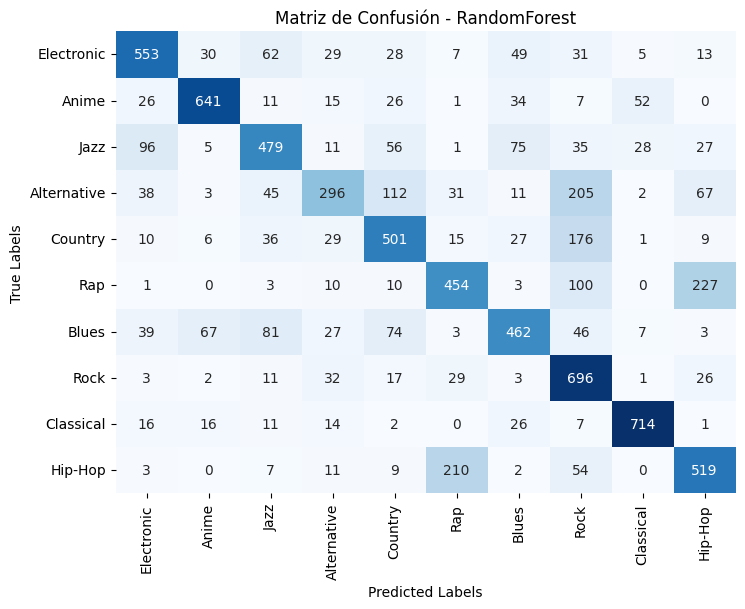

Modelo: XGBoost
Balanced Accuracy en el conjunto de prueba: 0.6556



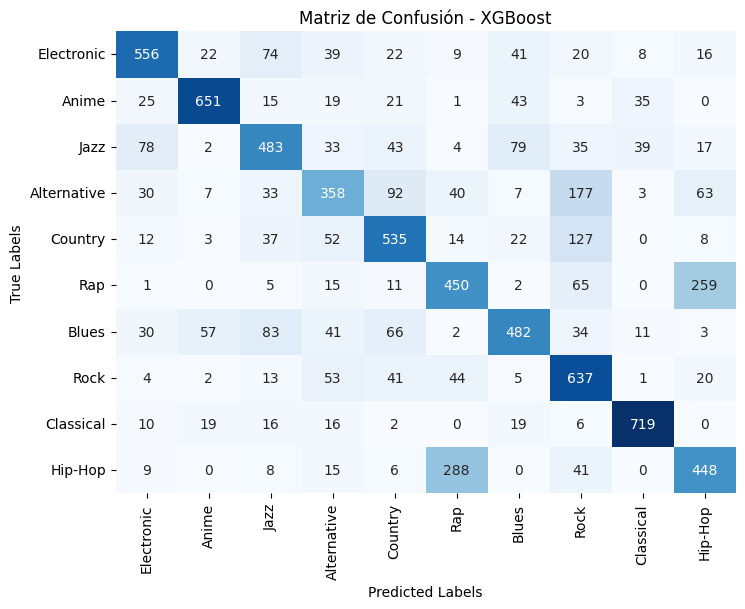

Modelo: LightGBM
Balanced Accuracy en el conjunto de prueba: 0.6404



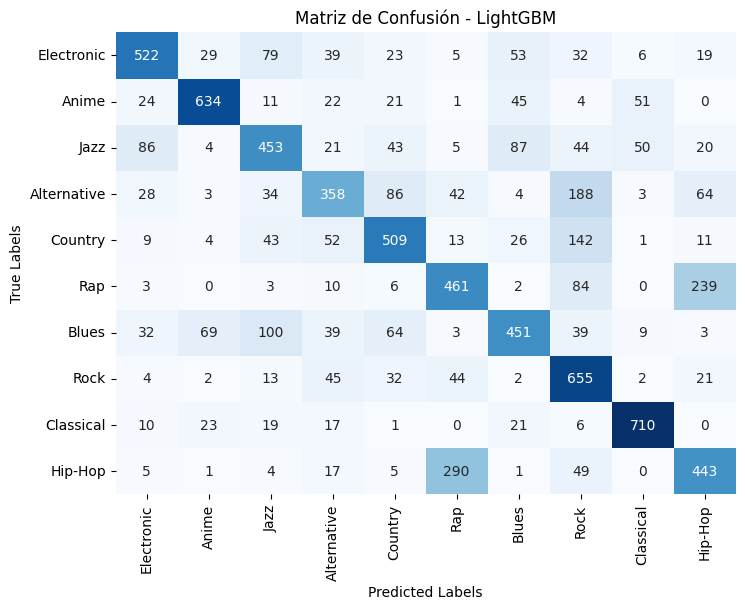

Modelo: CatBoost
Balanced Accuracy en el conjunto de prueba: 0.6354



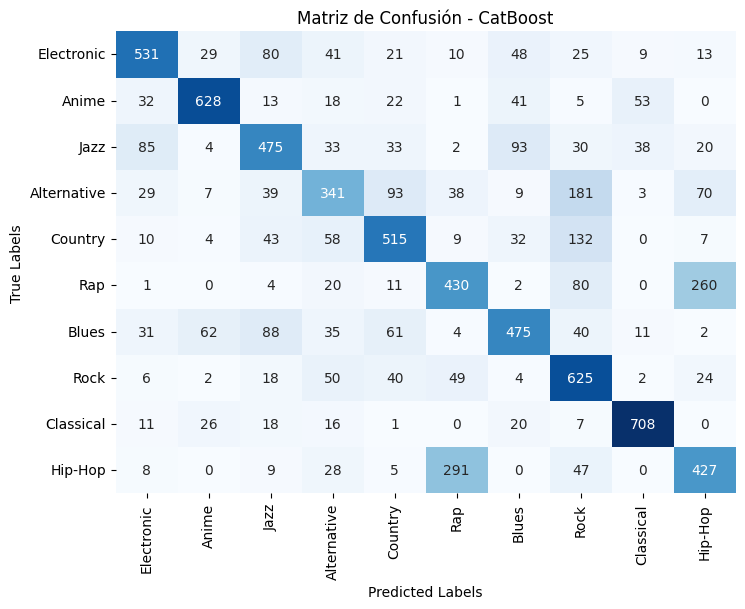

In [107]:
# Se van a poner de nuevo los nombres de los generos de las canciones

category_mapping = {
    0: 'Electronic',
    1: 'Anime',
    2: 'Jazz',
    3: 'Alternative',
    4: 'Country',
    5: 'Rap',
    6: 'Blues',
    7: 'Rock',
    8: 'Classical',
    9: 'Hip-Hop'
}

labels = list(category_mapping.values())

# Evaluación 
print("\nResultados en el conjunto de prueba final:")
for model_name, model, best_score in grid_search_results:
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred, average='macro')
    
    # Balanced accuracy 
    print(f"Modelo: {model_name}")
    print(f"Balanced Accuracy en el conjunto de prueba: {test_recall:.4f}\n")
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()